## Demonstrate the localization of density matrix, as well as orbital localization using one-dimensional examples

Lin Lin

Last revision:9/24/2018

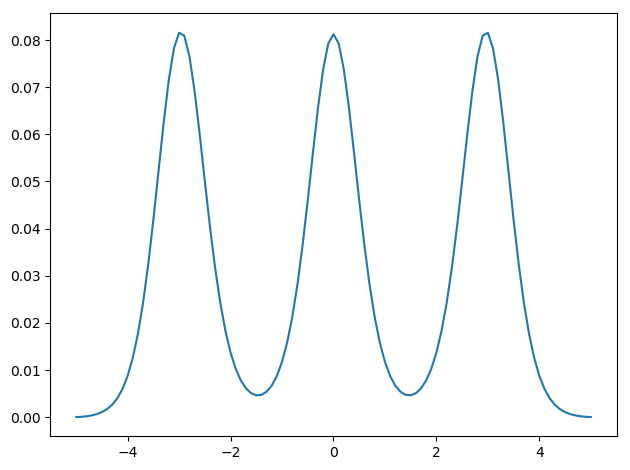

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f22e27c42b0>

In [34]:
using LinearAlgebra
using PyPlot

dx = 0.1

κ = 0.100
ϵ_0 = 1.0

Natoms = 3
N = Natoms
R = LinRange(-3.0, 3.0, Natoms)
Z = 1.0 * ones(Natoms)
sigma = 0.5 * ones(Natoms)

vC(x) = 1.0 / (ϵ_0 * sqrt(x^2 + κ^2))

Ls = 5.0

gridpos = collect(range(-Ls,stop=Ls,step=dx))
Ns = length(gridpos)

vC_mat = [vC(gridpos[i]-gridpos[j]) for i in 1:Ns, j in 1:Ns]

rhoa_atom = zeros(Ns,Natoms)
rhoa = zeros(Ns)
for j = 1 : Natoms
    dist = gridpos .- R[j]
    @. rhoa_atom[:,j] = - Z[j] / sqrt(2*pi*sigma[j]^2) * (exp(-0.5*(dist/sigma[j])^2 ))
    rhoa .= rhoa + rhoa_atom[:,j]
end

Vext = vC_mat * rhoa * dx

Lap = 1.0 / (2.0*dx^2) * diagm(-1=>-ones(Ns-1),0=>2.0*ones(Ns),1=>-ones(Ns-1))

H = Lap + diagm(0=>Vext)

fact = eigen(H)

energy = fact.values[1:N]
Psi = fact.vectors[:,1:N]
rho = vec(sum(abs.(Psi.^2),dims=2))

plot(gridpos, rho)

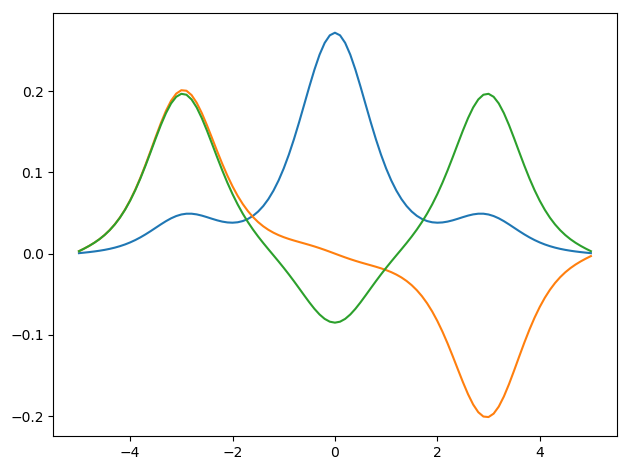

3-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f22e2723198>
 PyObject <matplotlib.lines.Line2D object at 0x7f22e2723358>
 PyObject <matplotlib.lines.Line2D object at 0x7f22e27234a8>

In [35]:
plot(gridpos, Psi[:,1:N])

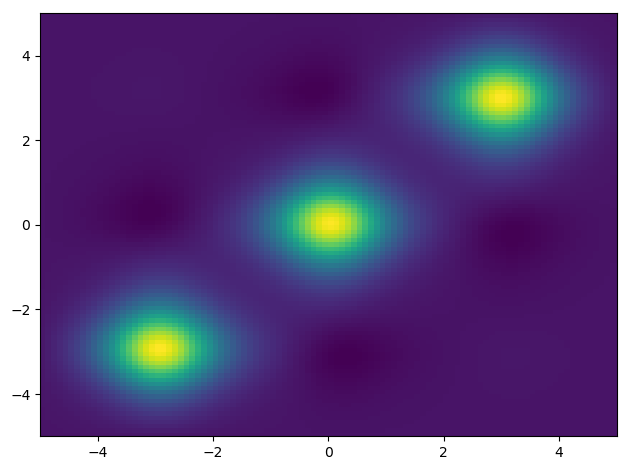

PyObject <matplotlib.collections.PolyCollection object at 0x7f22e20a1780>

In [37]:
# Density matrix

P = Psi * Psi'
pcolor(gridpos, gridpos, P)

## Localization using selected columns of density matrix

In [38]:
# Cholesky QR

fact=qr(Psi', Val(true))
perm = fact.p[1:N]
Xi = Psi[perm,:]'
Q = Matrix(fact.Q)
R1 = fact.R[1:N,1:N]

display(diag(R1))

Pc = Psi*Xi
display(Pc'*Pc)

3-element Array{Float64,1}:
 -0.2855768799092196 
  0.2855700464910208 
 -0.28444861389876425

3×3 Array{Float64,2}:
  0.0815542     0.000564178  -0.00361025
  0.000564178   0.0815542    -0.00361025
 -0.00361025   -0.00361025    0.0812285 

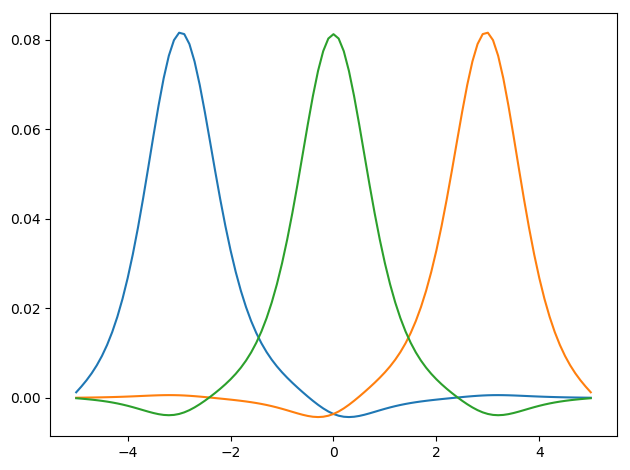

3-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f22e1ac47b8>
 PyObject <matplotlib.lines.Line2D object at 0x7f22e1ac4978>
 PyObject <matplotlib.lines.Line2D object at 0x7f22e1ac4ac8>

In [39]:
plot(gridpos, Pc)

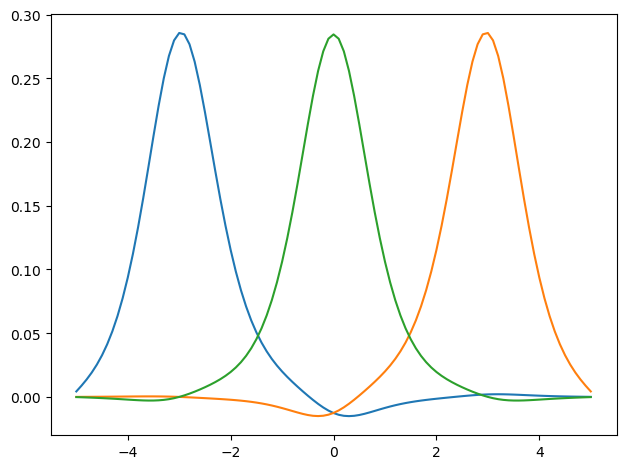

3-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f22e1a1ed30>
 PyObject <matplotlib.lines.Line2D object at 0x7f22e1a1eef0>
 PyObject <matplotlib.lines.Line2D object at 0x7f22e1a26080>

In [40]:
U_Chol = Q
Phi = Psi * U_Chol

# Make sure the maximum has a positive sign
for i = 1 : N
    M1 = maximum(Phi[:,i])
    m1 = minimum(Phi[:,i])
    sgn = (abs(M1) > abs(m1)) ? 1 : -1
    Phi[:,i] = Phi[:,i] * sgn
end

Phi_Chol = Phi

plot(gridpos, Phi_Chol)

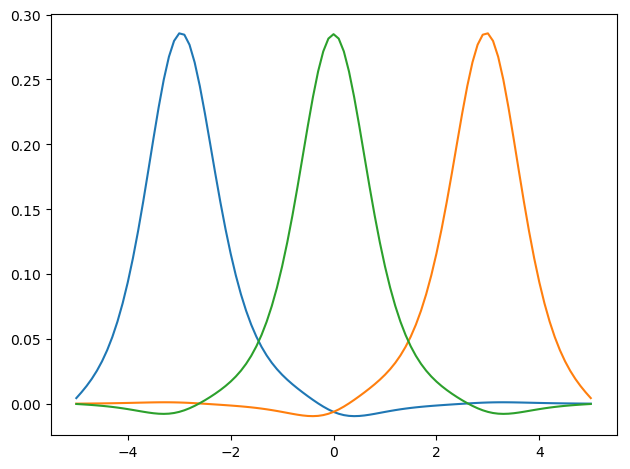

3-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f22e19ffdd8>
 PyObject <matplotlib.lines.Line2D object at 0x7f22e19fff98>
 PyObject <matplotlib.lines.Line2D object at 0x7f22e198a128>

In [41]:
# Lowdin orthogonalization

fact=qr(Psi', Val(true))
perm = fact.p[1:N]
Xi = Psi[perm,:]'

U_Lowdin = Xi*inv(sqrt(Xi'*Xi))
Phi = Psi * U_Lowdin


# Make sure the maximum has a positive sign
for i = 1 : N
    M1 = maximum(Phi[:,i])
    m1 = minimum(Phi[:,i])
    sgn = (abs(M1) > abs(m1)) ? 1 : -1
    Phi[:,i] = Phi[:,i] * sgn
end

Phi_Lowdin = Phi

plot(gridpos, Phi_Lowdin)

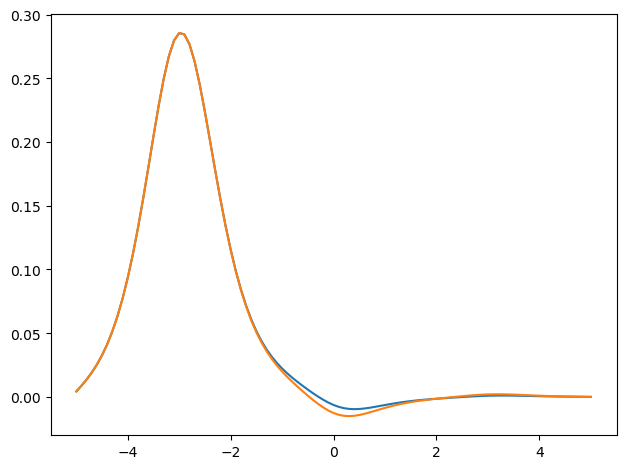

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f22e1962cc0>
 PyObject <matplotlib.lines.Line2D object at 0x7f22e1962e80>

In [42]:
plot(gridpos, Phi_Lowdin[:,1], gridpos, Phi_Chol[:,1])

In [43]:
display(U_Chol)
display(U_Lowdin)

3×3 Array{Float64,2}:
 -0.168836   0.167672  -0.971278   
 -0.704657  -0.709548  -1.37668e-14
 -0.689169   0.684417   0.237949   

3×3 Array{Float64,2}:
 0.189593   0.189593   0.963384   
 0.707107  -0.707107   1.66685e-14
 0.681216   0.681216  -0.268124   